In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile("data/帳戶schema.xlsx")
Onshore= xls.parse(1)
Offshore = xls.parse(3)
Omnibus = xls.parse(5)

# Onshore

In [3]:
def new_city(x):
    x=x[:3]
    x = x.replace("臺","台")
    new=["新北市","桃園市","台中市","高雄市","台南市"]
    old = ["台北縣","桃園縣","台中縣","高雄縣","台南縣"]
    if x in old:
        return new[old.index(x)]
    else:
        if x not in ["台北市","新北市","基隆市","新竹市","桃園市","新竹縣","台中市","苗栗縣","彰化縣","南投縣","雲林縣","高雄市","台南市","嘉義市","嘉義縣","屏東縣","澎湖縣","金門縣","宜蘭縣","花蓮縣","台東縣"]:
            return "None"
        else:
            return x
def city_group(x):
    if x =="None":
        return "None"
    city = {"North":["台北市","新北市","基隆市","新竹市","桃園市","新竹縣"],"Center":["台中市","苗栗縣","彰化縣","南投縣","雲林縣"],
            "South":["高雄市","台南市","嘉義市","嘉義縣","屏東縣"],"East":["宜蘭縣","花蓮縣","台東縣"],"offshore_islands ":["金門縣","澎湖縣"]}
    for area in city:
        if x in city[area]:
            return area
#AGE
Onshore["age"] = pd.to_datetime(Onshore['birthdate'].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)
#location
Onshore["location"] = Onshore.address1_line1.apply(new_city)
#area
Onshore["area"] =  Onshore.location.apply(city_group)

In [4]:
Onshore.head()

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,institutionname,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,郵局代銷,SEC00TEAM1,TＯam1 SE,NaN,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9,41,新北市,North
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,CY603,A0567,周Ｏ賢,NaN,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF,24,嘉義縣,South
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,北區壽險組,LF00000001,壽Ｏ通路投信,NaN,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F,26,基隆市,North
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,台中分公司,A0715,郭Ｏ展,NaN,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC,53,彰化縣,Center
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,台中分公司,A0288,龔Ｏ銘,NaN,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0,48,台中市,Center


In [5]:
Onshore_person = Onshore[Onshore.beneficiariestype=="個人(自然人)"].copy()
Onshore_company = Onshore[Onshore.beneficiariestype=="民營事業"].copy()

In [6]:
#受益人類別
Onshore.groupby("agentcode")["beneficiariestype"].value_counts().to_frame().unstack().fillna(0).astype(int)

beneficiariestype     
beneficiariestype           個人(自然人) 民營事業
agentcode                               
311710                            1    0
A000159078                        8    0
A0275                             0    1
A0278                             1    0
A0288                             1    0
A0307                             0    4
A0367                             3    0
A0431                            12    0
A0460                             1    0
A0524                            14    0
A0532                             2    0
A0639                             1    0
A0642                             2    0
A0700                             2    0
A0715                             1    0
A0769                            24    0
A0776                             2    0
A0780                             1    1
C000467580                        1    0
H000141315                        1    0
J000725232                        1    0
L000523853                        1    0
LF00000001                        1    0
N001809176                        1    0
N001980909                        1    0
R001155043                        1    0
RCAM1                             8    0
S000589626                        2    0

In [7]:
#自然人

#性別
gender_onP = Onshore_person.groupby("agentcode")["gendercode"].value_counts().to_frame().unstack().fillna(0)
#區域
area_onP = Onshore_person.groupby("agentcode")["area"].value_counts().to_frame().unstack().fillna(0)
#年齡
def age_group(x):
    if x<=20:
        return "20↓" 
    elif x>20 and x<=30:
        return "20-30" 
    elif x>30 and x<=40:
        return "30-40" 
    elif x>40 and x<=50:
        return "40-50"
    elif x>50 and x<=60:
        return "50-60" 
    elif x>60:
        return "60↑"
# def age_group(x):
#     if x<30:
#         return "young"
#     elif x>65:
#         return "old"
#     else:
#         return "middle"
Onshore_person["age_group"] = Onshore_person.age.apply(age_group)
age_onP = Onshore_person.groupby("agentcode")["age_group"].value_counts().to_frame().unstack().fillna(0)
#地區
loc_onP = Onshore_person.groupby("agentcode").location.value_counts().to_frame().unstack().fillna(0)
#高收益債風險預告書
hydrf_onP = Onshore_person.groupby("agentcode")["highyielddebtriskforecast"].value_counts().to_frame().unstack().fillna(0)

In [8]:
On_agent_df = pd.concat([gender_onP,age_onP,hydrf_onP,area_onP,loc_onP],axis=1).astype(int)
On_agent_df

gendercode    age_group                            \
gendercode          F  M     20-30 20↓ 30-40 40-50 50-60 60↑   
agentcode                                                      
311710              1  0         0   0     0     1     0   0   
A000159078          2  6         2   4     0     2     0   0   
A0278               1  0         0   0     0     1     0   0   
A0288               0  1         0   0     0     1     0   0   
A0367               0  3         0   0     2     0     0   1   
A0431               8  4         3   2     2     1     3   1   
A0460               1  0         0   0     1     0     0   0   
A0524              11  3         2   0     3     5     3   1   
A0532               2  0         0   0     1     1     0   0   
A0639               0  1         0   0     0     1     0   0   
A0642               1  1         0   0     0     1     1   0   
A0700               1  1         1   0     0     1     0   0   
A0715               1  0         0   0     0     0     1   0   
A0769              15  9         4   1     7     3     5   4   
A0776               2  0         1   0     0     0     0   1   
A0780               0  1         0   0     0     0     1   0   
C000467580          1  0         0   0     1     0     0   0   
H000141315          0  1         1   0     0     0     0   0   
J000725232          1  0         0   0     1     0     0   0   
L000523853          0  1         0   0     0     0     1   0   
LF00000001          0  1         1   0     0     0     0   0   
N001809176          1  0         1   0     0     0     0   0   
N001980909          1  0         0   1     0     0     0   0   
R001155043          1  0         1   0     0     0     0   0   
RCAM1               4  4         0   0     1     1     2   4   
S000589626          0  2         0   2     0     0     0   0   

           highyielddebtriskforecast    ... location                          \
gendercode                         N  Y ...      屏東縣 彰化縣 新北市 新竹市 新竹縣 桃園市 花蓮縣   
agentcode                               ...                                    
311710                             1  0 ...        0   0   1   0   0   0   0   
A000159078                         8  0 ...        0   0   5   0   0   0   0   
A0278                              0  1 ...        0   0   0   0   0   0   0   
A0288                              0  1 ...        0   0   0   0   0   0   0   
A0367                              0  3 ...        0   0   0   0   0   0   0   
A0431                             10  2 ...        0   0   3   1   1   1   0   
A0460                              0  1 ...        0   0   0   0   0   1   0   
A0524                             11  3 ...        1   1   3   0   1   1   0   
A0532                              0  2 ...        0   0   1   0   0   0   0   
A0639                              0  1 ...        0   0   0   0   0   0   0   
A0642                              0  2 ...        0   0   0   0   0   0   0   
A0700                              0  2 ...        0   0   1   0   0   0   0   
A0715                              0  1 ...        0   1   0   0   0   0   0   
A0769                             22  2 ...        0   1   4   3   1   4   1   
A0776                              2  0 ...        0   0   0   0   0   0   0   
A0780                              0  1 ...        0   0   0   0   0   0   0   
C000467580                         0  1 ...        0   0   1   0   0   0   0   
H000141315                         0  1 ...        0   0   0   0   0   1   0   
J000725232                         1  0 ...        0   0   0   0   0   1   0   
L000523853                         0  1 ...        0   0   0   0   1   0   0   
LF00000001                         0  1 ...        0   0   0   0   0   0   0   
N001809176                         0  1 ...        0   0   0   0   0   0   0   
N001980909                         0  1 ...        0   0   0   0   0   0   0   
R001155043                         0  1 ...        0   0   0   0   0   0  

In [9]:
#民營企業
area_onC = Onshore_company.groupby("agentcode")["area"].value_counts().to_frame().unstack().fillna(0)
loc_onC = Onshore_company.groupby("agentcode").location.value_counts().to_frame().unstack().fillna(0)
hydrf_onC = Onshore_company.groupby("agentcode")["highyielddebtriskforecast"].value_counts().to_frame().unstack().fillna(0)
company_df = pd.concat([hydrf_onC,area_onC,loc_onC],axis=1).astype(int)
company_df

highyielddebtriskforecast   area       location      \
highyielddebtriskforecast                         Y Center North      台中市 台北市   
agentcode                                                                       
A0275                                             1      1     0        0   0   
A0307                                             4      4     0        1   0   
A0780                                             1      0     1        0   1   

                                   
highyielddebtriskforecast 彰化縣 苗栗縣  
agentcode                          
A0275                       0   1  
A0307                       3   0  
A0780                       0   0

In [ ]:
#df = Onshore_person[Onshore_person.agentcode=="A0769"][["gendercode","area","age_group","highyielddebtriskforecast"]]
#df.to_csv("A0769.csv",encoding="utf-8",index=False)

In [16]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# 北、南部中年女性 

In [11]:
On_agent_df[["gendercode","age_group","highyielddebtriskforecast","area"]].loc["A0524"].to_frame()

A0524
                          gendercode       
gendercode                F              11
                          M               3
age_group                 20-30           2
                          20↓             0
                          30-40           3
                          40-50           5
                          50-60           3
                          60↑             1
highyielddebtriskforecast N              11
                          Y               3
area                      Center          3
                          East            0
                          North           6
                          South           5

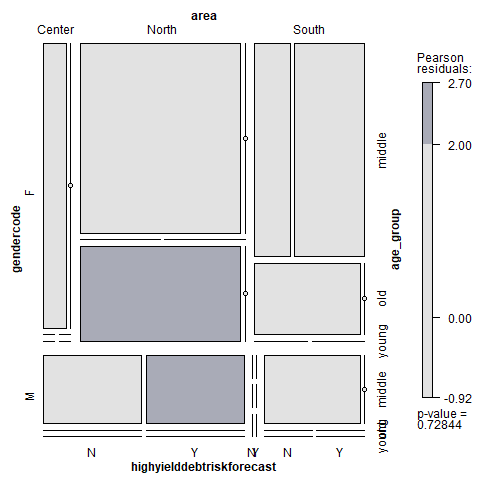

In [12]:
%%R
library(vcd)
test = read.csv("A0524.csv",sep =",",fileEncoding ="UTF-8",header = T)
mosaic(table(test),shade=TRUE,legend=TRUE)

In [13]:
On_agent_df[["gendercode","age_group","highyielddebtriskforecast","area"]].loc["A0769"].to_frame()

A0769
                          gendercode       
gendercode                F              15
                          M               9
age_group                 20-30           4
                          20↓             1
                          30-40           7
                          40-50           3
                          50-60           5
                          60↑             4
highyielddebtriskforecast N              22
                          Y               2
area                      Center          5
                          East            1
                          North          16
                          South           2

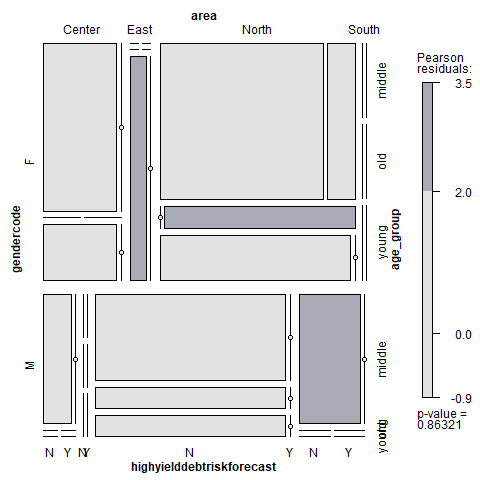

In [18]:
%%R
# library(vcd)
test = read.csv("A0769.csv",sep =",",fileEncoding ="UTF-8",header = T)
mosaic(table(test),shade=TRUE,legend=TRUE)

# Offshore

In [19]:
#AGE
Offshore["age"] = pd.to_datetime(Offshore['birthdate'].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)
#location
Offshore["location"] = Offshore.address1_composite.apply(new_city)
#area
Offshore["area"] = Offshore.location.apply(city_group)
#age
Offshore["age_group"] = Offshore.age.apply(age_group)

Offshore = Offshore[Offshore.location!="None"]

In [20]:
Offshore.head()

,accountnumber,accountid,identifycode,gendercode,birthdate,accountname,englishlastname,englishfirstname,telephone1,telephone2,...,status,lifeinsurancefundslicense,ownerid,accountdate,updatedate,DMID,age,location,area,age_group
0,3158,936077,A222******,F,1965-03-31,林Ｏ柔 ...,...,PEI-JOU ...,,,...,D,NaN,NaN,1996-11-11,2006-02-08,CCD01D2C-A0BB-0150-B56C-A16543C78D61,53.0,新北市,North,50-60
1,40,1046036,G120******,M,1958-11-18,楊Ｏ宗 ...,...,YIN-TSUNG ...,,,...,D,NaN,NaN,2000-01-14,2006-02-08,6FCBE594-8DA6-AC31-A42A-237DC7F56816,60.0,台北市,North,50-60
2,3093,1069189,A127******,M,1966-11-22,孫Ｏ傑 ...,...,YING-CHIEH ...,,,...,,NaN,NaN,1996-10-16,2015-05-29,7BBFBC22-C799-26D8-1EED-A7490ECFD156,52.0,台北市,North,50-60
3,3145,1080213,A102******,M,1947-11-20,徐Ｏ堯 ...,...,YONG-YAO ...,,,...,,NaN,NaN,1996-11-04,2015-05-26,15FB3270-AD0A-BDB1-D4C5-7037120D2A6D,71.0,台北市,North,60↑
4,131,1226301,D220******,M,1956-07-12,陳Ｏ英 ...,...,YUN-YIN ...,,,...,D,NaN,NaN,2000-02-23,2000-02-23,853AD3BA-0983-B0AA-DFE4-2AB291C392B2,62.0,台北市,North,60↑


In [21]:
Offag = Offshore.agentcode.value_counts().to_frame()
Onag = Onshore.agentcode.value_counts().to_frame()
Omag = Omnibus.agentcode.value_counts().to_frame()
agent_df = pd.concat([Onag,Offag,Omag],axis=1,sort=False).fillna(0).astype(int)
agent_df.columns = ["Offshore","Onshore","Omnibus"]
agent_df

,Offshore,Onshore,Omnibus
A0769,24,0,0
A0524,14,0,9
A0431,12,0,4
RCAM1,8,0,25
A000159078,8,0,0
A0307,4,0,2
A0367,3,0,2
A0532,2,0,2
A0642,2,0,0
A0776,2,0,1


In [22]:
#性別
gender_off = Offshore.groupby("agentcode")["gendercode"].value_counts().to_frame().unstack().fillna(0)
#區域
area_off = Offshore.groupby("agentcode")["area"].value_counts().to_frame().unstack().fillna(0)
#年齡
age_off = Offshore.groupby("agentcode")["age_group"].value_counts().to_frame().unstack().fillna(0)
loc_off = Offshore.groupby("agentcode").location.value_counts().to_frame().unstack().fillna(0)

In [25]:
Offshore_df = pd.concat([gender_off,age_off,area_off,loc_off],axis=1).astype(int)
Offshore_df

gendercode    age_group                   area                   \
gendercode          F  M     20-30 40-50 50-60 60↑ Center East North South   
agentcode                                                                    
A000514964          1  0         0     0     1   0      0    0     1     0   
A0243               1  0         0     0     1   0      1    0     0     0   
A0257               1  0         0     0     0   1      0    0     0     1   
A0264               1  1         0     0     1   1      0    0     2     0   
A0269               0  2         0     0     0   2      0    0     0     2   
A0273               0  1         0     0     0   1      0    0     0     1   
A0278               2  0         0     0     1   1      0    0     2     0   
A0291               0  2         0     1     1   0      0    0     2     0   
A110169660          1  0         0     0     0   1      0    0     1     0   
B0059               1  2         0     0     1   2      0    0     2     1   
B0152               2  0         0     1     1   0      0    0     0     2   
B0165               5  3         1     0     4   3      0    0     8     0   
B0174               0  2         0     1     0   1      2    0     0     0   
B0211               5  3         0     2     3   3      0    0     1     7   
B0264              10  5         1     4     7   3      0    0    15     0   
B120564347          0  1         0     0     1   0      1    0     0     0   
B220837687          1  0         0     1     0   0      1    0     0     0   
C000082490          0  1         0     0     0   1      0    0     1     0   
C000635482          1  0         1     0     0   0      0    0     0     1   
C200656249          3  0         0     0     0   3      0    0     3     0   
C220432405          3  2         0     0     3   2      0    0     5     0   
D001396636          1  0         0     0     0   1      0    0     1     0   
E120082665          1  0         1     0     0   0      0    0     0     1   
F002177197          1  1         0     0     2   0      0    0     2     0   
F120359206          1  0         0     0     1   0      1    0     0     0   
H001713333          0  1         0     0     1   0      0    0     1     0   
LF00000001          1  1         1     0     1   0      0    0     2     0   
R102998035          3  8         0     2     8   0      0    1    10     0   
RCAM2               0  2         0     2     0   0      0    0     2     0   

           location                                  
gendercode      台中市 台北市 台南市 宜蘭縣 彰化縣 新北市 新竹市 桃園市 高雄市  
agentcode                                            
A000514964        0   0   0   0   0   0   0   1   0  
A0243             0   0   0   0   1   0   0   0   0  
A0257             0   0   1   0   0   0   0   0   0  
A0264             0   0   0   0   0   0   1   1   0  
A0269             0   0   0   0   0   0   0   0   2  
A0273             0   0   1   0   0   0   0   0   0  
A0278             0   2   0   0   0   0   0   0   0  
A0291             0   0   0   0   0   2   0   0   0  
A110169660        0   1   0   0   0   0   0   0   0  
B0059             0   2   0   0   0   0   0   0   1  
B0152             0   0   1   0   0   0   0   0   1  
B0165             0   2   0   0   0   5   1   0   0  
B0174             2   0   0   0   0   0   0   0   0  
B0211             0   1   1   0   0   0   0   0   6  
B0264             0  10   0   0   0   0   1   4   0  
B120564347        1   0   0   0   0   0   0   0   0  
B220837687        0   0   0   0   1   0   0   0   0  
C000082490        0   1   0   0   0   0   0   0   0  
C000635482        0   0   0   0   0   0   0   0   1  
C200656249        0   3   0   0   0   0   0   0   0  
C220432405        0   2   0   0   0   3   0   0   0  
D001396636        0   1   0   0   0   0   0   0   0  
E120082665        0   0   0   0   0   0   0   0   1  
F002177197        0   0   0   0   0   0   0   2   0  
F120359206        1   0   0   0   0   0   0   0   0  
H0